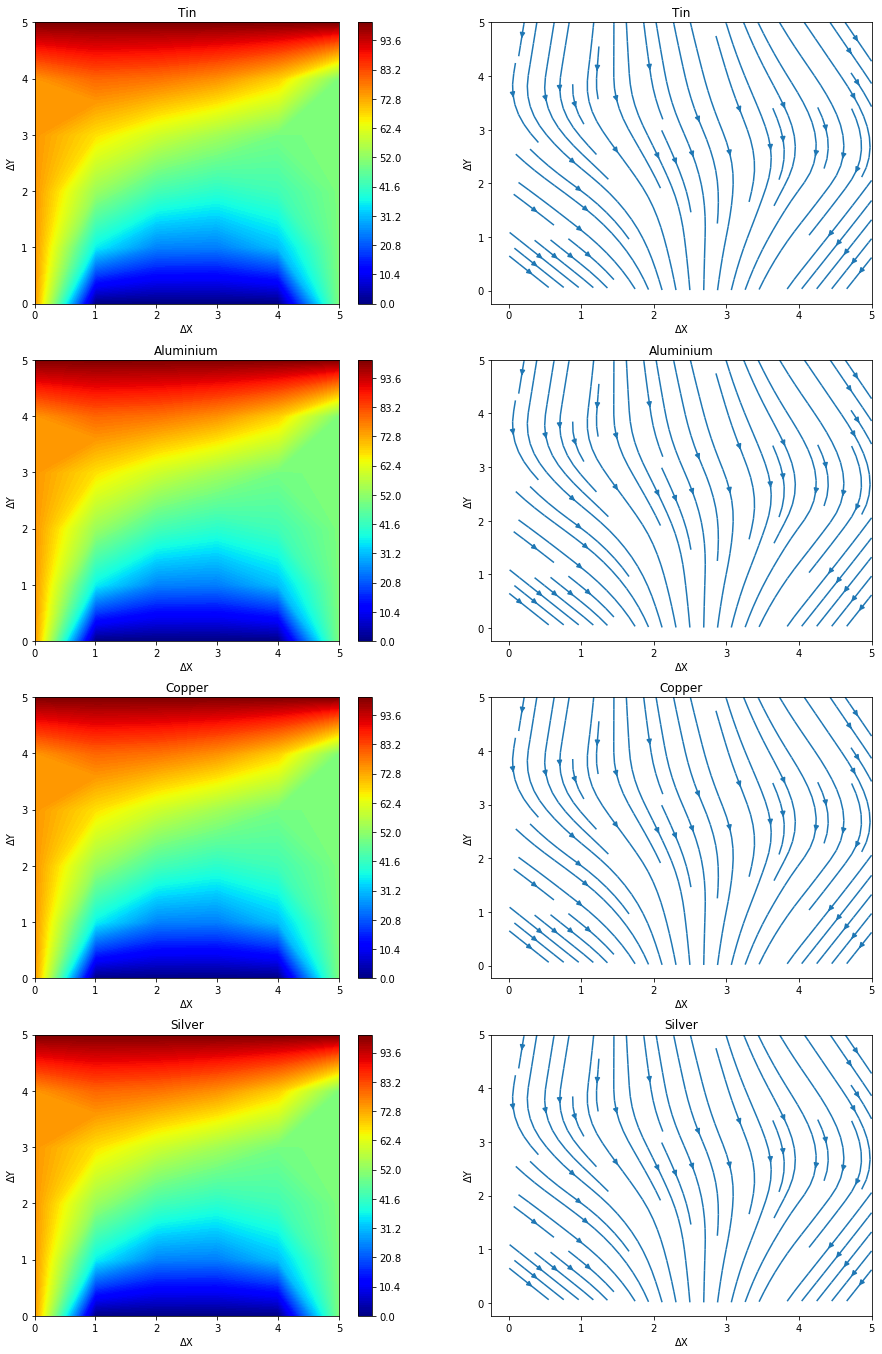

In [20]:
# Made by RODRIGO CARDENAS DOMINGUEZ.
# March 2nd, 2018.
# UNIVERSIDAD IBEROAMERICANA, ENGINEERING PHYSICS.

# FINITE DIFFERENCE: ELYPTIC EQUATIONS.
# LAPLACE EQUATION FOR A HEATED PLATE.
# DIRICHLET TYPE FRONTIER CONDITIONS.

import matplotlib.pyplot as plt
import numpy as np
import math as mt

# Δx = 1 cm

M = ['Tin', 'Aluminium', 'Copper', 'Silver']
a = np.array([0.4, 0.835, 1.11, 1.6563])        # coefficient of thermal diffusity [cm^2/s]
p = np.array([7.27, 2.7, 8.96, 10.49])          # density [g/cm^3]
C = np.array([0.05, 0.2174, 0.0923, 0.056])     # heat capacity [cal/(g·ºC)]
k = np.zeros(4)                                 # coefficient of thermal conductivity [cal/(s·cm·ºC)]

X = np.arange(6)
Y = np.arange(6)

plt.figure(figsize=(15, 30))

for n in range(0, 4):
    
    k[n] = a[n]*p[n]*C[n]
    
    A = np.array([[75.0, 0.0, 0.0, 0.0, 0.0, 50.0], 
                  [75.0, 0.0, 0.0, 0.0, 0.0, 50.0], 
                  [75.0, 0.0, 0.0, 0.0, 0.0, 50.0], 
                  [75.0, 0.0, 0.0, 0.0, 0.0, 50.0], 
                  [75.0, 0.0, 0.0, 0.0, 0.0, 50.0],
                  [100.0, 100.0, 100.0, 100.0, 100.0, 100.0]])

    error = 1.0

    qx = np.zeros((6,6))
    qy = np.zeros((6,6))

    while( error > 0.001):
        T = np.array(A)
        for i in range(1, 5):
            for j in range(1, 5):
                T[i, j] = (T[i+1, j+1] + T[i-1, j] + T[i, j+1] + T[i, j-1])/4
                T[i, j] = 1.5*T[i, j] - 0.5*A[i, j]
        error = abs((T[1,1] - A[1,1])/T[1,1])
        A = T

    for i in range(1, 5):
        for j in range(1, 5):
            qx[i,j] = (-k[n])*((A[i+1, j] - A[i-1, j])/20)
            qy[i,j] = (-k[n])*((A[i, j+1] - A[i, j-1])/20)

    plt.subplot(5,2,2*n+1)
    plt.contourf(X,Y,A,150)
    plt.xlabel('ΔX')
    plt.ylabel('ΔY')
    plt.title(M[n])
    plt.set_cmap('jet')
    plt.colorbar()
    
    plt.subplot(5,2,2*n+2)
    plt.streamplot(X,Y,qy,qx, cmap='autum')
    plt.xlabel('ΔX')
    plt.ylabel('ΔY')
    plt.title(M[n])
    
plt.show()